In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from tad4bj import DataStorage

EXPERIMENT_SIZE_FIELDS = [
    "number_of_fragments", 
    "points_per_fragment", 
]

PLATFORM_FIELDS = [
    "nodes",
    "cpus_per_node",
    "backends_per_node",
]

In [2]:
def smart_mean(row):
    it_times = row["iteration_time"]
    
    if it_times:
        count = len(it_times)
        if count > 0:
            row["min_time"] = np.min(it_times)
            row["mean_time"] = np.mean(it_times)
            row["std_time"] = np.std(it_times)
            row["count"] = len(it_times)
            
    if not row['dataclay']:
        row['mode'] = "COMPSs"
    elif row['use_split']:
        row['mode'] = "dC+split"
    else:
        row['mode'] = "dC"

    if row['use_reduction_decorator']:
        row['mode'] += "+reduction"

    return row

db = DataStorage("histogram-split")
#df = db.to_dataframe().apply(smart_mean, axis=1).query("start_ts > '2021-02-09'")
df = db.to_dataframe().apply(smart_mean, axis=1).query("(start_ts > '2021-02-26') and (use_reduction_decorator == 1)") #.query('dataclay == 1')
#df

In [3]:
byproduct = df.groupby(EXPERIMENT_SIZE_FIELDS + ['mode'] + PLATFORM_FIELDS).agg({"mean_time": ["mean"], "min_time": ["min"], "std_time": ["mean"]})
# The "condensed" dataframe, containing the rellevant data properly condensed
cdf = byproduct.reset_index()
# Flatten columns
cdf.columns = [col[0] for col in cdf.columns.values]
cdf

,number_of_fragments,points_per_fragment,mode,nodes,cpus_per_node,backends_per_node,mean_time,min_time,std_time
0,96,102400000,COMPSs+reduction,3,48,48,12.943639,12.741838,0.199704
1,96,102400000,dC+reduction,3,48,48,12.428909,12.100676,0.158130
2,96,102400000,dC+split+reduction,3,48,48,12.829859,12.386837,0.266584
3,192,51200000,COMPSs+reduction,3,48,48,NaN,NaN,NaN
4,192,51200000,dC+reduction,3,48,48,NaN,NaN,NaN
5,192,51200000,dC+split+reduction,3,48,48,12.762889,12.426551,0.245965
6,384,25600000,COMPSs+reduction,3,48,48,NaN,NaN,NaN
7,384,25600000,dC+reduction,3,48,48,NaN,NaN,NaN
8,384,25600000,dC+split+reduction,3,48,48,12.827277,12.529784,0.274208
9,768,12800000,COMPSs+reduction,3,48,48,NaN,NaN,NaN


## Mean time

<AxesSubplot:xlabel='number_of_fragments', ylabel='mean_time'>

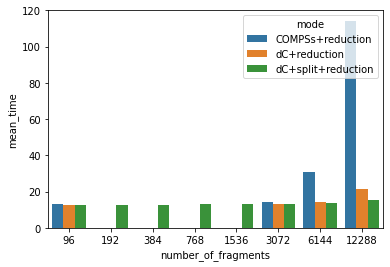

In [4]:
sns.barplot(data=cdf, x="number_of_fragments", hue="mode", y="mean_time")

<AxesSubplot:xlabel='number_of_fragments', ylabel='mean_time'>

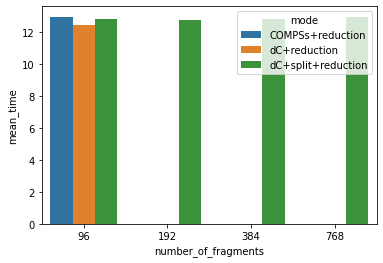

In [5]:
sns.barplot(data=cdf.query("number_of_fragments < 1000"), x="number_of_fragments", hue="mode", y="mean_time")

## Min time

<AxesSubplot:xlabel='number_of_fragments', ylabel='min_time'>

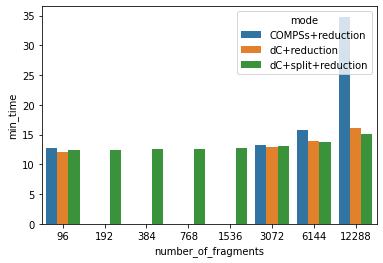

In [6]:
sns.barplot(data=cdf, x="number_of_fragments", hue="mode", y="min_time")

<AxesSubplot:xlabel='number_of_fragments', ylabel='min_time'>

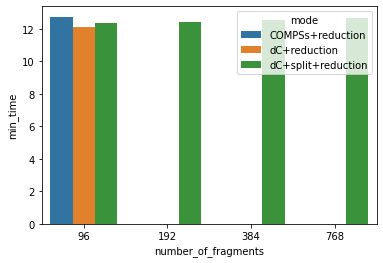

In [7]:
sns.barplot(data=cdf.query("number_of_fragments < 1000"), x="number_of_fragments", hue="mode", y="min_time")